In [69]:
import numpy as np
import pandas as pd
import datetime as dt
import linearmodels
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import matplotlib as mpl
import scipy.stats as stats
import seaborn as sns
import matplotlib.dates as md
from scipy.stats.mstats import winsorize
from linearmodels import PanelOLS
from IPython.display import display, HTML
from linearmodels.panel import PooledOLS

In [70]:
df = pd.read_csv(r'C:\Users\yasam\Downloads\Corporat.csv', parse_dates = ['datadate'])
lent_total =len(df)
df


,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,at,...,prstkc,pstk,pstkl,sale,txditc,xint,costat,prcc_f,loc,sic
0,1004,1996-05-31,1995.0,INDL,C,D,STD,AAR CORP,USD,437.846,...,1.552,0.000,0.000,504.990,30.680,10.616,A,22.125,USA,5080.0
1,1010,1995-12-31,1995.0,INDL,C,D,STD,ACF INDUSTRIES INC,USD,2015.800,...,0.000,0.000,0.000,407.200,268.200,96.800,I,NaN,USA,3743.0
2,1013,1995-10-31,1995.0,INDL,C,D,STD,ADC TELECOMMUNICATIONS INC,USD,601.083,...,0.000,0.000,0.000,586.222,1.256,0.275,I,40.000,USA,3661.0
3,1019,1995-12-31,1995.0,INDL,C,D,STD,AFA PROTECTIVE SYSTEMS INC,USD,28.487,...,0.365,0.000,0.000,27.492,1.224,0.139,A,115.000,USA,7380.0
4,1021,1995-06-30,1995.0,INDL,C,D,STD,AFP IMAGING CORP,USD,11.790,...,0.000,1.278,1.278,26.589,0.000,0.575,I,0.875,USA,3844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266910,282553,2008-12-31,NaN,INDL,C,D,STD,CDTI ADVANCED MATERIALS INC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,USA,3714.0
266911,282553,2009-12-31,NaN,INDL,C,D,STD,CDTI ADVANCED MATERIALS INC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,USA,3714.0
266912,291758,2012-12-31,NaN,INDL,C,D,STD,PURPLE BIOTECH LTD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,ISR,2834.0
266913,294911,2015-09-30,NaN,INDL,C,D,STD,SAMA RESOURCES INC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,CAN,1000.0


In [71]:
lent_total

266915

In [72]:
df_us = df[df['loc'] =='USA']
lent_us = len(df_us)
lent_us
df_us


,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,at,...,prstkc,pstk,pstkl,sale,txditc,xint,costat,prcc_f,loc,sic
0,1004,1996-05-31,1995.0,INDL,C,D,STD,AAR CORP,USD,437.846,...,1.552,0.000,0.000,504.990,30.680,10.616,A,22.125,USA,5080.0
1,1010,1995-12-31,1995.0,INDL,C,D,STD,ACF INDUSTRIES INC,USD,2015.800,...,0.000,0.000,0.000,407.200,268.200,96.800,I,NaN,USA,3743.0
2,1013,1995-10-31,1995.0,INDL,C,D,STD,ADC TELECOMMUNICATIONS INC,USD,601.083,...,0.000,0.000,0.000,586.222,1.256,0.275,I,40.000,USA,3661.0
3,1019,1995-12-31,1995.0,INDL,C,D,STD,AFA PROTECTIVE SYSTEMS INC,USD,28.487,...,0.365,0.000,0.000,27.492,1.224,0.139,A,115.000,USA,7380.0
4,1021,1995-06-30,1995.0,INDL,C,D,STD,AFP IMAGING CORP,USD,11.790,...,0.000,1.278,1.278,26.589,0.000,0.575,I,0.875,USA,3844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266907,272838,2013-12-31,NaN,INDL,C,D,STD,SUNDANCE ENERGY AUSTRALIA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,USA,1311.0
266908,282553,2006-12-31,NaN,INDL,C,D,STD,CDTI ADVANCED MATERIALS INC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,USA,3714.0
266909,282553,2007-12-31,NaN,INDL,C,D,STD,CDTI ADVANCED MATERIALS INC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,USA,3714.0
266910,282553,2008-12-31,NaN,INDL,C,D,STD,CDTI ADVANCED MATERIALS INC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,USA,3714.0


In [73]:
print ('The Original number of observation = ' , lent_total)
print ('The number of firms headquarted in the U.S. = ' , lent_us)

The Original number of observation =  266915
The number of firms headquarted in the U.S. =  208750


<AxesSubplot:xlabel='fyear'>

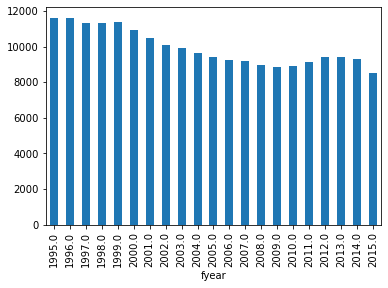

In [74]:

# Make counts
df2 = df_us.groupby(['fyear'])['fyear'].count()
df2.plot.bar()



Q1-2

In [75]:
df1 = df_us.copy()
df1['book_lev_1'] = (df1[ 'dlc' ]+ df1['dltt'])/df1['at' ]
df1['book_lev_2'] = (df1['lt' ]/df1['at'])
df1['mrkt_val_equity'] = (df1['csho']*df1['prcc_f'])
df1['mrkt_lev'] = (df1['dlc']+df1['dltt'])/(df1['dlc']+df1['dltt']+df1['pstk']+df1['csho']*df1['prcc_f'])
df1['mrkt_to_book'] = (df1['prcc_f']*df1['csho']+df1['dltt']+df1['dlc']+df1['pstkl']-df1['txditc'])/df1['at']
df1['lat'] = df1['at'].shift(1)
df1['lprice'] = df1['prcc_f'].shift(1)
df1['asset_grw'] = df1['at']/df1['lat']-1
df1['asset_tang'] = df1['ppent']/df1['at']
df1['ret_on_equity'] = df1['ni']/df1['ceq']
df1['prof_margin'] = df1['ni']/df1['sale']
df1['capex_ratio']= (df1['capx']/df1['at'])
df1['dividend_yield'] = (df1['dv']/df1['csho'])/(df1['lprice']/df1['csho'])
df1['dividend_pay_ratio'] = df1['dv']/df1['ni']
df1['total_pay_ratio'] = (df1['dv']+ df1['prstkc'])/df1['ni']
df1['EBIT_int_cov'] = df1['ebit']/df1['xint'] 
df1['cash_holdng'] = df1['che']/df1['at']
df1['profitbility'] = df1['oibdp']/df1['at']
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()



In [76]:
#winsorized datafram for each year:
year = ['1995', '1996', '1997','1998','1999','2000','2001','2002','2003','2004','2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015']
for i in range (0,21):
    year[i] = df1.loc[df1.fyear == 1995.0+i]

In [ ]:
for i in range(0,21) :
    year[i]['book_lev_1'] = winsorize(year[i]['book_lev_1'], limits=[0.01,0.01])
    year[i]['book_lev_2'] = winsorize(year[i]['book_lev_2'], limits=[0.01,0.01])
    year[i]['mrkt_val_equity'] = winsorize(year[i]['mrkt_val_equity'], limits=[0.01,0.01])
    year[i]['mrkt_lev'] = winsorize(year[i]['mrkt_lev'], limits=[0.01,0.01])
    year[i]['mrkt_to_book'] = winsorize(year[i]['mrkt_to_book'], limits=[0.01,0.01])
    year[i]['asset_grw'] = winsorize(year[i]['asset_grw'], limits=[0.01,0.01])
    year[i]['asset_tang'] = winsorize(year[i]['asset_tang'], limits=[0.01,0.01])
    year[i]['ret_on_equity'] = winsorize(year[i]['ret_on_equity'], limits=[0.01,0.01])
    year[i]['prof_margin'] = winsorize(year[i]['prof_margin'], limits=[0.01,0.01])
    year[i]['capex_ratio'] = winsorize(year[i]['capex_ratio'], limits=[0.01,0.01])
    year[i]['dividend_yield'] = winsorize(year[i]['dividend_yield'], limits=[0.01,0.01])
    year[i]['dividend_pay_ratio'] = winsorize(year[i]['dividend_pay_ratio'], limits=[0.01,0.01])
    year[i]['total_pay_ratio'] = winsorize(year[i]['total_pay_ratio'], limits=[0.01,0.01])
    year[i]['EBIT_int_cov'] = winsorize(year[i]['EBIT_int_cov'], limits=[0.01,0.01])
    year[i]['cash_holdng'] = winsorize(year[i]['cash_holdng'], limits=[0.01,0.01])
    year[i]['profitbility'] = winsorize(year[i]['profitbility'], limits=[0.01,0.01])




df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()



In [101]:
#concatenate the datafram
df2 = year[0]

for i in range (1,21) :
    df2 =pd.concat([df2,year[i]])
    
#eliminate extra data[]
df_2=df2[['fyear','book_lev_1','book_lev_2','mrkt_val_equity','mrkt_lev','mrkt_to_book','asset_grw','asset_tang','ret_on_equity','prof_margin','capex_ratio','dividend_yield','dividend_pay_ratio','total_pay_ratio','EBIT_int_cov','cash_holdng','profitbility']]

df3=df_2.set_index('fyear')
df4 = pd.DataFrame(df3.notnull().sum(), columns = {('non_missing')})

#summary statistics
table = df3.describe()
table = pd.concat([table, df4.transpose()])
table

,book_lev_1,book_lev_2,mrkt_val_equity,mrkt_lev,mrkt_to_book,asset_grw,asset_tang,ret_on_equity,prof_margin,capex_ratio,dividend_yield,dividend_pay_ratio,total_pay_ratio,EBIT_int_cov,cash_holdng,profitbility
count,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000
mean,0.384870,0.831331,2110.920809,0.271937,2.458336,295.428816,0.274099,0.005643,-1.691066,0.056459,20.899596,0.123457,0.287544,8.031892,0.152013,-0.087378
std,0.809527,1.820455,7588.709591,0.256763,6.309145,3065.929723,0.248392,1.566004,11.810162,0.070304,211.706440,0.469902,1.054234,176.488609,0.193160,0.867878
min,0.000000,0.057343,0.178552,0.000000,0.109361,-0.999917,0.000000,-12.920837,-244.920000,0.000000,0.000000,-3.370275,-7.715553,-1307.222222,0.000000,-11.919643
25%,0.081087,0.374833,22.628500,0.052585,0.770547,-0.898449,0.072900,-0.076683,-0.102830,0.014050,0.000000,-0.000000,0.000000,-1.570662,0.020826,0.002046
50%,0.244202,0.562343,147.144060,0.199361,1.141630,-0.015827,0.193212,0.081681,0.020129,0.033819,0.000000,0.000000,0.000000,2.425034,0.072609,0.093155
75%,0.426213,0.751012,908.584370,0.426268,1.972441,8.404619,0.415605,0.176775,0.069881,0.069508,0.219616,0.064376,0.355782,8.999608,0.204083,0.153414
max,13.866667,30.789474,112110.920000,0.987499,144.861446,107407.035714,0.938204,13.376164,1.225000,0.482903,6432.324243,5.507446,9.351359,1977.506329,0.941304,0.458940
non_missing,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000,69363.000000


Q1.3

In [104]:
#Spliting the firms into 4 groups
df5 =df_2
quartile = df5['mrkt_val_equity'].quantile([0.00, 0.25, 0.50, 0.75,1.00])
q1 = df5[((df5['mrkt_val_equity']>=quartile[0.00])&(df5['mrkt_val_equity']<quartile[0.25]))]
q2 = df5[((df5['mrkt_val_equity']>=quartile[0.25])&(df5['mrkt_val_equity']<quartile[0.50]))]
q3 = df5[((df5['mrkt_val_equity']>=quartile[0.50])&(df5['mrkt_val_equity']<quartile[0.75]))]
q4 = df5[((df5['mrkt_val_equity']>=quartile[0.75])&(df5['mrkt_val_equity']<quartile[1.00]))]

#Ratios for the smallest quartiles:
q1_ratio = pd.DataFrame(q1.mean(), columns={('mean')})
q1_ratio ['median'] = q1.median()
q1_ratio ['std'] = q1.std()

ratio_s = q1_ratio.transpose()
ratio_s.drop('fyear', axis=1, inplace=True) 
ratio_s



,book_lev_1,book_lev_2,mrkt_val_equity,mrkt_lev,mrkt_to_book,asset_grw,asset_tang,ret_on_equity,prof_margin,capex_ratio,dividend_yield,dividend_pay_ratio,total_pay_ratio,EBIT_int_cov,cash_holdng,profitbility
mean,0.710420,1.570506,8.438866,0.378323,3.435861,31.217123,0.252973,-0.000959,-3.540312,0.048031,0.362193,0.020115,0.056422,-23.316058,0.141066,-0.479568
median,0.323514,0.690425,7.007550,0.322036,0.986913,-0.923213,0.166899,0.034786,-0.084745,0.021892,0.000000,0.000000,0.000000,-1.324548,0.063410,-0.006041
std,1.446509,3.301713,6.425328,0.306025,8.987677,595.640262,0.247017,2.386491,16.837185,0.073565,11.466859,0.237169,0.631921,134.602571,0.189069,1.458646


In [105]:
#Ratios for the largestt quartiles:
q4_ratio = pd.DataFrame(q4.mean(), columns={('mean')})
q4_ratio ['median'] = q4.median()
q4_ratio ['std'] = q4.std()

ratio_l = q4_ratio.transpose()
ratio_l.drop('fyear', axis=1, inplace=True) 
ratio_l

,book_lev_1,book_lev_2,mrkt_val_equity,mrkt_lev,mrkt_to_book,asset_grw,asset_tang,ret_on_equity,prof_margin,capex_ratio,dividend_yield,dividend_pay_ratio,total_pay_ratio,EBIT_int_cov,cash_holdng,profitbility
mean,0.270081,0.581779,7820.649620,0.223606,1.856902,805.377909,0.306976,0.130332,-0.136699,0.057551,70.894245,0.248717,0.596912,37.339663,0.123979,0.137682
median,0.251512,0.582057,2875.683340,0.181582,1.315293,9.109373,0.230863,0.129588,0.065621,0.040211,1.221278,0.102929,0.409997,6.422018,0.066080,0.133758
std,0.202000,0.260103,13082.233503,0.187493,2.653090,5174.797343,0.254396,0.708081,4.661665,0.060896,389.130615,0.563769,1.225135,169.423014,0.151541,0.122423


Q1.4

In [121]:
df_fin = df2[(df2['sic']>=6000) & (df2['sic']<6800)]
ave_fin = df_fin['sic'].count()/20
ave_non = (df2['sic'].count()-df_fin['sic'].count())/20
print('Average number of financial firms =', ave_fin)
print('Average number of non_financial firms =', ave_non)

#create an indicator for utility/regulated firms???
#df2['utility'] = (np.where((df2['sic']>=4000) & (df2['sic']<5000)) ,
df_util = df2[(df2['sic']>=4000) & (df2['sic']<5000)]


Average number of financial firms = 311.65
Average number of non_financial firms = 3156.5


Q1.5

In [139]:

df_nonfin = df2.drop(df_fin.index)
df_nonutil = df2.drop(df_util.index)


In [ ]:
#Ratios for financial firms
df_fin2 = df_fin[['book_lev_1','book_lev_2','mrkt_lev']]
df_fin2.describe()

In [ ]:
#Ratios for utility firms
df_util2 = df_util[['book_lev_1','book_lev_2','mrkt_lev']]
df_util2.describe()

In [ ]:
# Ratios for non-financial and non-utility firms

df_non = pd.merge(df_nonfin, df_nonutil, on=['gvkey','datadate','fyear',	'indfmt','consol','popsrc','datafmt','conm','curcd','at','capx','ceq','che','csho','dlc','dltt','dv','ebit','lt','ni','oibdp','ppent','prstkc','pstk','pstkl','sale','txditc','xint','costat','prcc_f','loc','sic'],how='inner')
df_non2 = df_non[['book_lev_1_x','book_lev_2_x','mrkt_lev_x']]
df_non2.describe()


Q2-1-a:


array([[<AxesSubplot:xlabel='book_lev_1_x', ylabel='book_lev_1_x'>,
        <AxesSubplot:xlabel='EBIT_int_cov_x', ylabel='book_lev_1_x'>,
        <AxesSubplot:xlabel='cash_holdng_x', ylabel='book_lev_1_x'>,
        <AxesSubplot:xlabel='profitbility_x', ylabel='book_lev_1_x'>,
        <AxesSubplot:xlabel='total_pay_ratio_x', ylabel='book_lev_1_x'>,
        <AxesSubplot:xlabel='mrkt_to_book_x', ylabel='book_lev_1_x'>],
       [<AxesSubplot:xlabel='book_lev_1_x', ylabel='EBIT_int_cov_x'>,
        <AxesSubplot:xlabel='EBIT_int_cov_x', ylabel='EBIT_int_cov_x'>,
        <AxesSubplot:xlabel='cash_holdng_x', ylabel='EBIT_int_cov_x'>,
        <AxesSubplot:xlabel='profitbility_x', ylabel='EBIT_int_cov_x'>,
        <AxesSubplot:xlabel='total_pay_ratio_x', ylabel='EBIT_int_cov_x'>,
        <AxesSubplot:xlabel='mrkt_to_book_x', ylabel='EBIT_int_cov_x'>],
       [<AxesSubplot:xlabel='book_lev_1_x', ylabel='cash_holdng_x'>,
        <AxesSubplot:xlabel='EBIT_int_cov_x', ylabel='cash_holdng_x'>,
      

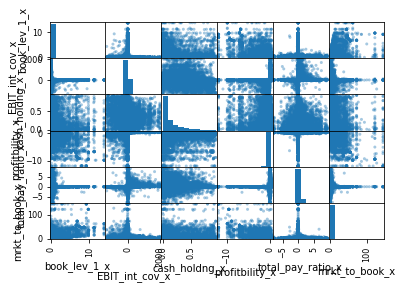

In [154]:
df_non3 = df_non[['book_lev_1_x','EBIT_int_cov_x','cash_holdng_x' ,'profitbility_x',
            'total_pay_ratio_x','mrkt_to_book_x']]
pd.plotting.scatter_matrix(df_non3, alpha=0.4)

Q2_1_b

<AxesSubplot:title={'center':'mrkt_to_book_x'}, xlabel='fyear'>

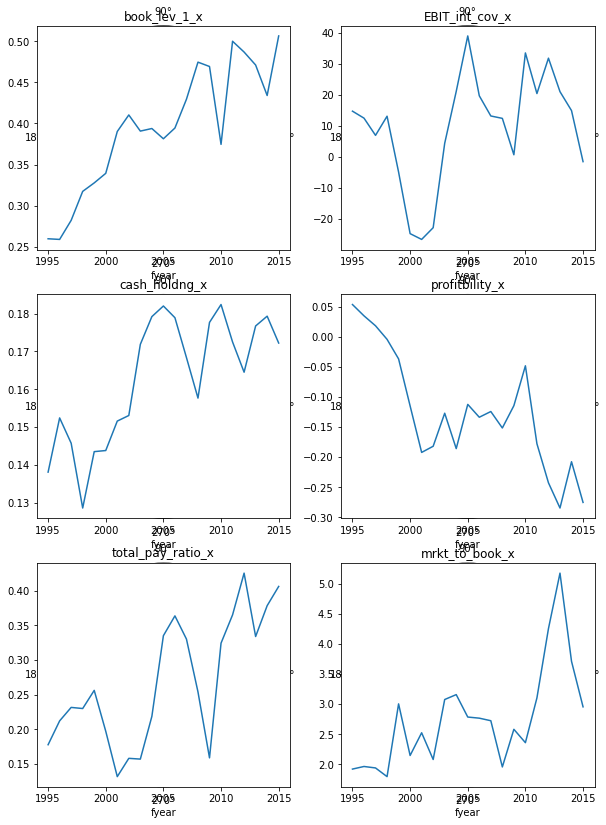

In [165]:
df_non4 = df_non[['book_lev_1_x','EBIT_int_cov_x','cash_holdng_x' ,'profitbility_x',
            'total_pay_ratio_x','mrkt_to_book_x','fyear']]

#Average plots
#plt.suptitle("")
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(10,14), subplot_kw=dict(projection="polar"))
ax = fig.add_subplot(3,2,1)
df_non4.groupby(['fyear'])['book_lev_1_x'].mean().plot(title="book_lev_1_x")

ax = fig.add_subplot(3,2,2)
df_non4.groupby(['fyear'])['EBIT_int_cov_x'].mean().plot(title="EBIT_int_cov_x")

ax = fig.add_subplot(3,2,3)
df_non4.groupby(['fyear'])['cash_holdng_x'].mean().plot(title="cash_holdng_x")

ax = fig.add_subplot(3,2,4)
df_non4.groupby(['fyear'])['profitbility_x'].mean().plot(title="profitbility_x")

ax = fig.add_subplot(3,2,5)
df_non4.groupby(['fyear'])['total_pay_ratio_x'].mean().plot(title="total_pay_ratio_x")

ax = fig.add_subplot(3,2,6)
df_non4.groupby(['fyear'])['mrkt_to_book_x'].mean().plot(title="mrkt_to_book_x")




Q2-2

Q2-3

In [166]:
crl_mtrx =df_non4.corr()
print(crl_mtrx)

                   book_lev_1_x  EBIT_int_cov_x  cash_holdng_x  \
book_lev_1_x           1.000000       -0.034337      -0.047839   
EBIT_int_cov_x        -0.034337        1.000000      -0.078825   
cash_holdng_x         -0.047839       -0.078825       1.000000   
profitbility_x        -0.627288        0.156979      -0.141527   
total_pay_ratio_x     -0.041532        0.077742      -0.051233   
mrkt_to_book_x         0.539194       -0.046999       0.164887   
fyear                  0.081726        0.030333       0.065272   

                   profitbility_x  total_pay_ratio_x  mrkt_to_book_x     fyear  
book_lev_1_x            -0.627288          -0.041532        0.539194  0.081726  
EBIT_int_cov_x           0.156979           0.077742       -0.046999  0.030333  
cash_holdng_x           -0.141527          -0.051233        0.164887  0.065272  
profitbility_x           1.000000           0.077838       -0.689249 -0.085049  
total_pay_ratio_x        0.077838           1.000000       -0.0380